In [1]:
# File : SongandDanceMan.ipynb
# Author : Jatan Pandya (https://github.com/jatanjay/)
# University of Massachusetts - Amherst

# **Song and Dance Man**
## A corpus based analysis on the works of Bob Dylan from the year 1960 to 2020

In [2]:
# you could add an image or something here

> ### **Start low, go slow. Catch fire, rise higher.**

#### Let's start by scratching the surface of Bob Dylan's corpus, by first cleaning, applying various Natrual Language Processing (NLP) text processing methods and then by extracting information about the same in a way that will help us understand the corpus in a much better way.Along the way, we'll acquaint ourselves with basics of NLP and concepts of English language etc. and ideas that come up in corpus based analysis.

### We will be using various meta files and the Corpus CSV file that we generated using 
### [CorpusGenius](https://github.com/jatanjay/CorpusGenius) for Bob Dylan
#### Files such as : 
##### 1.Dylan's corpus 
##### 2.Lyrics of songs released by year
##### 3.Dylan's Discography by year
##### 4.List of all songs relased by Dylan
#### Let's start by importing necessary modules for this project and the files that'll be needed 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import nltk
from nltk import ngrams
from pprint import pprint

In [4]:
dylan_albums = r"C:/Users/jayes/PycharmProjects/SongandDanceMan/Final_final_final_dylan/Dylan_albums.csv"
dylan_tracks = r"C:/Users/jayes/PycharmProjects/SongandDanceMan/Final_final_final_dylan/Dylan_tracks.csv"
dylan_lyrics = r"C:/Users/jayes/PycharmProjects/SongandDanceMan/Final_final_final_dylan/Dylan_lyrics.csv"
dylan_by_years = r"C:/Users/jayes/PycharmProjects/SongandDanceMan/Final_final_final_dylan/Dylan_lyrics_by_years.csv"
dylan_corpus = r"C:/Users/jayes/PycharmProjects/SongandDanceMan/Final_final_final_dylan/Dylan_corpus.csv"

In [5]:
# first albums released by years

In [6]:
albums = pd.read_csv(dylan_albums)
tracks = pd.read_csv(dylan_tracks)
lyrics = pd.read_csv(dylan_lyrics)
by_years = pd.read_csv(dylan_by_years,squeeze=True)

### Below are all the albums released by Bob Dylan

In [7]:
albums

,year,album title,album id
0,1962,Bob Dylan,26515
1,1963,The Freewheelin' Bob Dylan,17327
2,1964,The Times They Are A-Changin',28249
3,1964,Another Side of Bob Dylan,25519
4,1965,Bringing It All Back Home,17399
...,...,...,...
57,2017,Triplicate,328059
58,2018,"The Bootleg Series Vol. 14: More Blood, More T...",466127
59,2019,The Rolling Thunder Revue: The 1975 Live Recor...,648356
60,2019,"The Bootleg Series Vol. 15: Travelin' Thru, 19...",646838


### Below are all the tracks released by Bob Dylan

In [8]:
tracks

,album title,song title,song id,year
0,The Bootleg Series Vol. 8: Tell Tale Signs: Ra...,'Cross the Green Mountain,1006242,2008.0
1,NaN,'Cross the Green Mountain,1006242,NaN
2,Under the Red Sky,"10,000 Men",200681,1990.0
3,NaN,"10,000 Men",200681,NaN
4,NaN,2 X 2,200682,NaN
...,...,...,...,...
1917,NaN,"You're a Big Girl Now (9/16/74, Take 2)",3991896,NaN
1918,"The Bootleg Series Vol. 14: More Blood, More T...","You're a Big Girl Now (9/16/74, Take 2)",3991896,2018.0
1919,"The Bootleg Series Vol. 14: More Blood, More T...","You're a Big Girl Now (9/17/74 Take 1, Remake)",4124382,2018.0
1920,Fallen Angels,Young at Heart,2475866,2016.0


In [9]:
lyrics

,Unnamed: 0,lyrics
0,'Cross the Green Mountain,"{'I cross the green mountain, I slept by the s..."
1,"10,000 Men",{'Ten thousand men on a hill Ten thousand men ...
2,2 X 2,"{'One by one, they followed the sun One by one..."
3,4th Time Around,"{'When she said ""Dont waste your words, theyre..."
4,A Hard Rain's A-Gonna Fall [Gaslight 1962],"{'Oh, where have you been, my blue-eyed son? A..."
...,...,...
500,You're A Big Girl Now [Hard Rain],{'Our conversation was short and sweet It near...
501,You're Gonna Make Me Lonesome When You Go,{'Ive seen love go by my door Its never been t...
502,You're Gonna Make Me Lonesome When You Go (9/1...,{'Ive seen love go by my door Its never been t...
503,You're a Big Girl Now,{'Our conversation was short and sweet It near...


### Tweaks for plots

In [50]:
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 150

## In order to understand Dylan's discography and style, let's mess around with data directly 

### 1) Average word length by year 
#### For that, we'll make use of file "by_years". Below are all the lyrics (including released by each year)

In [11]:
## Clean clean clean 
by_years.columns = ['year','lyrics']
by_years = by_years.sort_values(by=['year'])
by_years

,year,lyrics
46,1962.0,{'Im out here a thousand miles from my home Wa...
7,1963.0,{'How many roads must a man walk down Before y...
17,1964.0,{'Hollis Brown He lived on the outside of town...
24,1965.0,{'Once upon a time you dressed so fine Threw t...
3,1966.0,{'Early in the mornin Early in the mornin Im c...
15,1967.0,{'I pity the poor immigrant Who wishes he woul...
39,1969.0,{'I have heard rumors all over town They say t...
18,1970.0,{'Cant you hear that rooster crowing? Rabbit r...
8,1971.0,{'I aint lookin to compete with you Beat or ch...
29,1973.0,{'Spend the night with some sweet senorita Int...


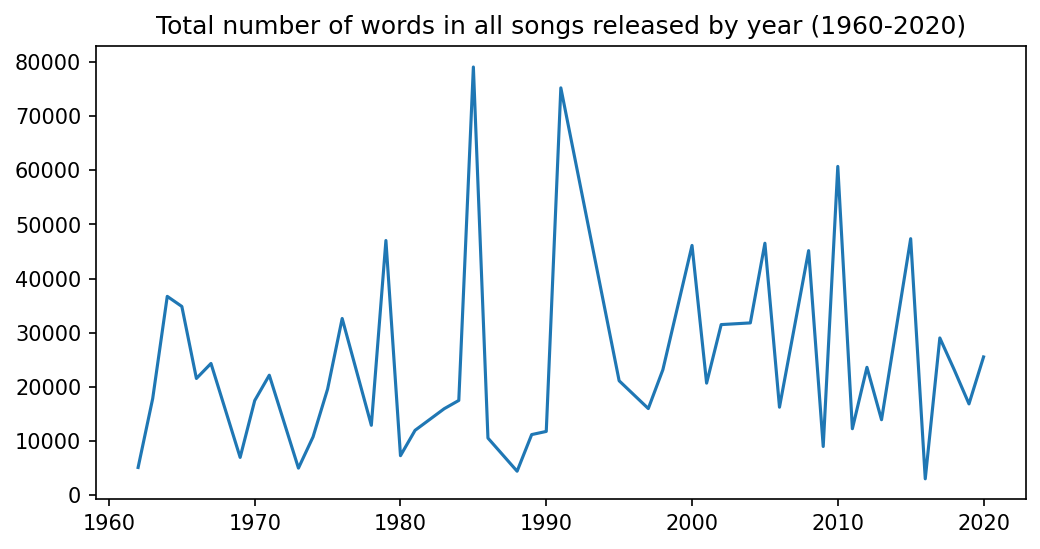

In [12]:
def lby_year(by_year):
    wrd_l = [len(song) for song in by_year['lyrics']]
    years = [year for year in by_year['year']]
    clubbed = pd.Series(wrd_l,years)
    return clubbed
word_length = lby_year(by_years)

def plt_wrd(word_length):
    plt.title("Total number of words in all songs released by year (1960-2020)")
    plt.plot(word_length)    
plt_wrd(word_length)

## Corpus Based Analysis : 

In [13]:
read_corpus = pd.read_csv(dylan_corpus)
read_corpus.columns = ['Sr. No',"Dylan's Corpus"]

In [14]:
read_corpus

,Sr. No,Dylan's Corpus
0,0,"'Go ahead, drive the nails through my hand Lau..."


In [162]:
corpus = [corpus for corpus in read_corpus["Dylan's Corpus"]]
corpus[0][:1000]

"'Go ahead, drive the nails through my hand Laugh at me where you stand Go ahead, say it isnt me But the day will come That you will see  Cause Ill rise again Aint no power on Earth can tie me down Yes, Ill rise again Death cant keep me buried in the ground  Go ahead and mock my name You will see, Im still the same Go ahead, try to bury me Very, very soon I will be free  Cause Ill rise again Aint no power on Earth can tie me now And Ill rise again Death cant keep me buried in the ground  Go ahead, say Im dead and gone You will see that you were wrong Go ahead, try to hide the Son But the day will come When youll see Im the one  Cause Ill rise again Aint no power on Earth can tie me down Yes, Ill rise again Death cant keep me buried in the ground''Unlike most of the songs nowadays that have been written up in Tin Pan Alley, thats where most of the folk songs come from nowadays, this, this is a song, this wasnt written up there, this was written somewhere down in the United States  Well,

In [16]:
for i in corpus:
    corpus_tokenized = nltk.wordpunct_tokenize(i)
corpus_tokenized[:10]

["'", 'Go', 'ahead', ',', 'drive', 'the', 'nails', 'through', 'my', 'hand']

In [17]:
corpus_words = [word for word in corpus_tokenized if word.isalpha()]

In [18]:
tokens = len(corpus_tokenized)
vocabulary = len(set(word.lower() for word in corpus_tokenized if word.isalpha()))
types = len(set(corpus_tokenized))
print(f"For artist Bob Dylan\n1) Total number of tokens are {tokens}\n2) Total number of types are {types}\n3) Vocab count {vocabulary}")

For artist Bob Dylan
1) Total number of tokens are 183085
2) Total number of types are 10187
3) Vocab count 8602


### 2) Lexical Deversity and Occurances 
#### Lexical Deversity is defined as ::

In [19]:
def lex_div(corpus):
    lex_div = vocabulary / len(corpus)
    print(f"Bob Dylan's Lexical Deversity is: {lex_div} or {lex_div*100} %")
lex_div(corpus_tokenized)

Bob Dylan's Lexical Deversity is: 0.04698364147800202 or 4.698364147800202 %


### Or can also be visualized as : 
### Occurances ::  See how many times words like love/hate/she/he appers
#### Hypothesis : There is only one song in which Bob Dylan mentions the name "Sara", hence should occur at only one particular section

In [20]:
corpus_text = nltk.Text(corpus_tokenized)
def occurs(words):
    for word in words:
        count = corpus_text.count(word)
        as_per = 100 * count / len(corpus_text)
        print(f"{as_per} % of the corpus is taken by word '{word}'")
        
occurs(["clown","Sara","she","She"])

0.00436955512466887 % of the corpus is taken by word 'clown'
0.013108665374006609 % of the corpus is taken by word 'Sara'
0.27746675041647323 % of the corpus is taken by word 'she'
0.21629297867110905 % of the corpus is taken by word 'She'


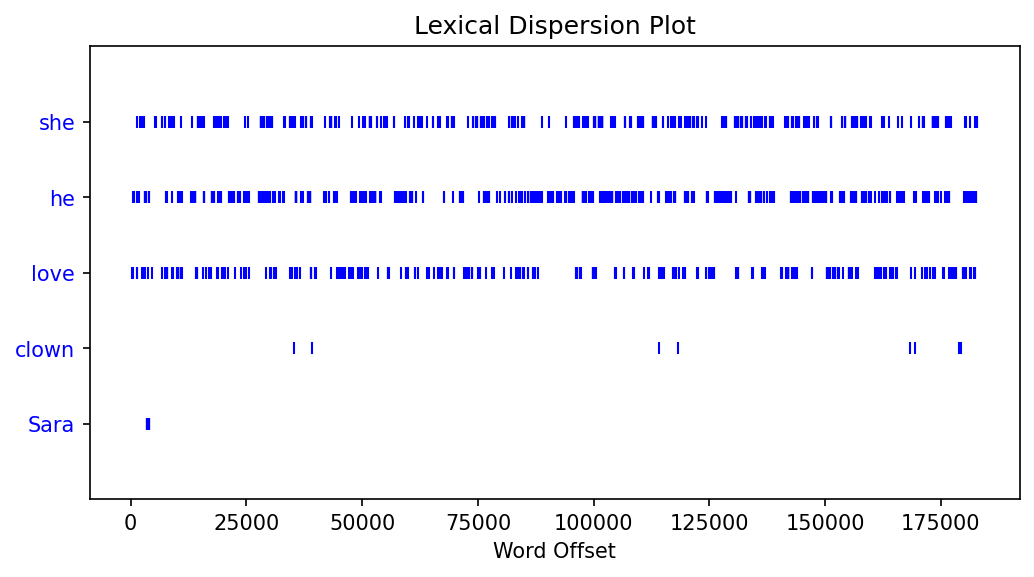

In [21]:
corpus_text.dispersion_plot(['she','he','love','clown','Sara'])

### Fast Facts :

In [22]:
largest_word = sorted(set(corpus_tokenized), key=len,reverse=True)[0]
print(f"Largest word in Bob Dylan's Corpus is : '{largest_word}' with length {len(largest_word)}.")

Largest word in Bob Dylan's Corpus is : 'unintentionally' with length 15.


### Average word length

In [23]:
length = list(map(len, corpus_words))
sum(length) / len(length)

3.9357830958184885

### Frquency of words:

In [24]:
freq_dist = nltk.FreqDist(word.lower() for word in corpus_tokenized if word.isalpha())

In [25]:
freq_dist.most_common(25)

[('the', 8634),
 ('i', 4741),
 ('you', 4493),
 ('and', 4455),
 ('to', 4300),
 ('a', 3855),
 ('in', 2791),
 ('of', 2524),
 ('me', 1865),
 ('my', 1820),
 ('that', 1744),
 ('it', 1716),
 ('on', 1541),
 ('your', 1451),
 ('he', 1252),
 ('for', 1226),
 ('all', 1204),
 ('was', 1199),
 ('is', 1180),
 ('but', 1145),
 ('be', 1092),
 ('im', 1052),
 ('with', 1014),
 ('she', 904),
 ('they', 844)]

### Hapaxes

In [26]:
hapaxes = freq_dist.hapaxes()

In [27]:
print(f"Total number of Hapaxes : {len(hapaxes)} or {100 * len(hapaxes)/vocabulary} % of the total corpus")

Total number of Hapaxes : 2792 or 32.45756800744013 % of the total corpus


In [28]:
hapaxes[:25]

['ranger',
 'tonto',
 'fixing',
 'shooter',
 'taketh',
 'teacheth',
 'builder',
 'rainbows',
 'shapeth',
 'turneth',
 'dwells',
 'solemnly',
 'lincolns',
 'bombed',
 'bled',
 'lynching',
 'gladiators',
 'cheered',
 'tread',
 'dread',
 'shedding',
 'layer',
 'persecutor',
 'manipulator',
 'sodom']

## Zipfs

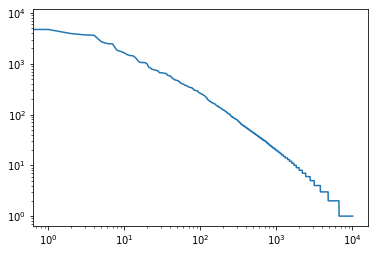

In [164]:
words = [w for w in corpus_tokenized if w.isalpha()]
fdist = nltk.FreqDist(words)
e = [no for no in fdist.values()]
counts = sorted(e,reverse=True)
plt.figure()
plt.yscale('log')
plt.xscale('log')
plt.plot(counts)

### According to the figure above, we can confirm Zipf's law. At the extreme right end of the plotted line, there are apparent steps, which means that a lot of words have quite low occurences. At the extreme left end, the line is quite flat, which means the frequencies of the first few most frequent words are close that they do not drop as quickly as the ones ranking in the middle.

### Question beggin through years

In [134]:
quest_dict = {}
def question(df):
    year = 0
    for song in df.lyrics.values:
        year += 1
        qm = song.count("?")
        quest_dict[year] = qm
    return quest_dict
question = question(by_years)
question_by_years = dict(zip(years[:-1], list(question.values()))) 

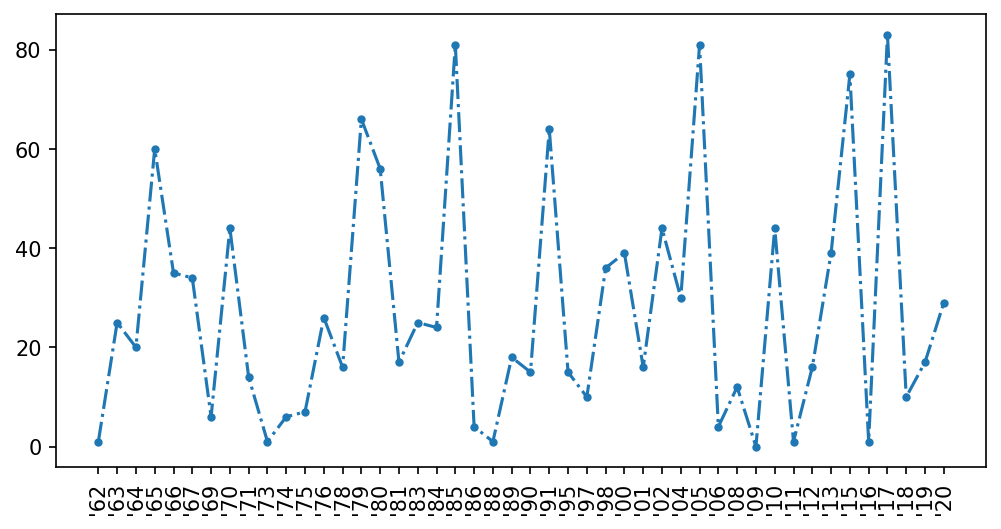

In [156]:
plt.xticks(rotation='vertical')
plt.plot(list(question_by_years.keys()),list(question_by_years.values()),".-.")

### Collocations (Bigrams/Trigrams) in Dylan's Corpus
#### Makes sense, sheer amount of repitation in songs. As expected most of the bigrams are just song names or hooks in the songs (Idiot wind ( song title ) / jingle jangle (Mr. Tambourine Man)) etc

In [29]:
corpus_text.collocations()

Key West; New York; true love; Tambourine Man; dont know; Idiot wind;
heavens door; neighborhood bully; Theyll stone; Memphis blues;
Desolation Row; door Knock; stuck inside; Queen Jane; far away; Wanted
man; simple twist; serve somebody; Handy Dandy; jingle jangle


### Most common n-grams 
#### 1) bigrams 2) trigrams 3) 4-gram 4) 5-gram 


In [99]:
bigrams = nltk.FreqDist(ngrams(corpus_words,2)).most_common(10)
trigrams = nltk.FreqDist(ngrams(corpus_words,3)).most_common(10)
grams_4 = nltk.FreqDist(ngrams(corpus_words,4)).most_common(10)
grams_5 = nltk.FreqDist(ngrams(corpus_words,5)).most_common(10)

In [100]:
bigrams

[(('in', 'the'), 973),
 (('on', 'the'), 456),
 (('of', 'the'), 441),
 (('to', 'the'), 402),
 (('I', 'was'), 260),
 (('to', 'be'), 256),
 (('I', 'dont'), 224),
 (('in', 'a'), 224),
 (('from', 'the'), 221),
 (('and', 'the'), 209)]

[(973, ('in', 'the')),
 (456, ('on', 'the')),
 (441, ('of', 'the')),
 (402, ('to', 'the')),
 (260, ('I', 'was')),
 (256, ('to', 'be')),
 (224, ('I', 'dont')),
 (224, ('in', 'a')),
 (221, ('from', 'the')),
 (209, ('and', 'the'))]

In [32]:
trigrams

[(('Im', 'going', 'to'), 51),
 (('I', 'dont', 'know'), 44),
 (('just', 'like', 'a'), 40),
 (('its', 'a', 'hard'), 40),
 (('Im', 'in', 'the'), 38),
 (('of', 'the', 'time'), 37),
 (('dont', 'know', 'what'), 36),
 (('I', 'want', 'you'), 36),
 (('I', 'got', 'a'), 35),
 (('want', 'to', 'be'), 34)]

In [33]:
grams_4

[(('knockin', 'on', 'heavens', 'door'), 33),
 (('the', 'Jack', 'of', 'Hearts'), 31),
 (('Come', 'in', 'she', 'said'), 30),
 (('in', 'she', 'said', 'Ill'), 30),
 (('she', 'said', 'Ill', 'give'), 30),
 (('Hey', 'Mr', 'Tambourine', 'Man'), 30),
 (('Mr', 'Tambourine', 'Man', 'play'), 30),
 (('Tambourine', 'Man', 'play', 'a'), 30),
 (('Man', 'play', 'a', 'song'), 30),
 (('play', 'a', 'song', 'for'), 30)]

In [34]:
grams_5

[(('Come', 'in', 'she', 'said', 'Ill'), 30),
 (('in', 'she', 'said', 'Ill', 'give'), 30),
 (('Hey', 'Mr', 'Tambourine', 'Man', 'play'), 30),
 (('Mr', 'Tambourine', 'Man', 'play', 'a'), 30),
 (('Tambourine', 'Man', 'play', 'a', 'song'), 30),
 (('Man', 'play', 'a', 'song', 'for'), 30),
 (('play', 'a', 'song', 'for', 'me'), 30),
 (('door', 'Knock', 'knock', 'knockin', 'on'), 27),
 (('Knock', 'knock', 'knockin', 'on', 'heavens'), 27),
 (('knock', 'knockin', 'on', 'heavens', 'door'), 27)]

In [35]:
as_dict = pd.Series(by_years.lyrics.values,index=by_years.year).to_dict()
years = ["'"+str(year)[2:-2] for year in as_dict.keys()]

In [36]:
# cfd = nltk.ConditionalFreqDist((year,word) 
#                                for year in years
#                                for word in as_dict[year].split())

### for ARI through years , use sentence segmentation 
Punkt sentence segmenter

## Segmentation

### The Automated Readability Index (ARI) of the text is defined to be: 4.71 μw + 0.5 μs - 21.43
#### Let us define μw to be the average number of letters per word, and μs to be the average number of words per sentence, in a given text. 

In [138]:
ari_dict = {}
def ari(df):
    year = 0
    for song in df.lyrics.values:
        year += 1
        punkted = nltk.sent_tokenize(song)
        uw = list(map(len, punkted))
        avg_uw = sum(uw) / len(uw)
        us = [len(sent.split()) for sent in punkted]
        avg_us = sum(us) / len(us)
        ari = 4.71 * avg_uw + 0.5 * avg_us - 21.43    
        ari_dict[year] = round(ari/1000)
    return ari_dict
ari = ari(by_years)
ari_by_years = dict(zip(years[:-1], list(ari.values()))) 

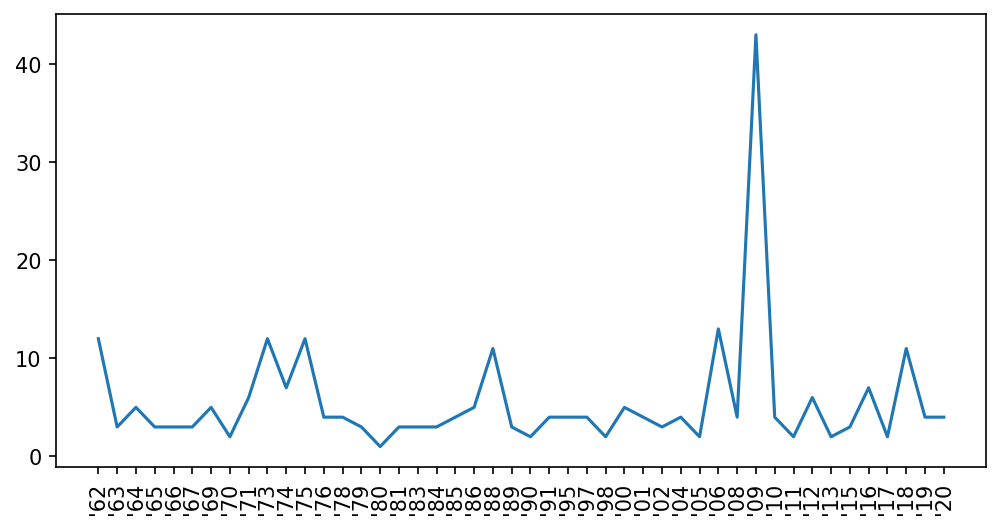

In [139]:
plt.xticks(rotation='vertical')
plt.plot(list(ari_by_years.keys()),list(ari_by_years.values()))

# Common Motifs 
### Synsets Perhaps?

## clean the corpus of stopwords, puncts
## extract all nouns
## make a set out of it 
## for each word make a synset
## show words with max synsets

## TF-IDF

How succesfull was BD in making in a "country Album"? -- Nashville skyline and others.. // Predict a song's genre 
World cloud on the final Corpus
Sentiment analysis by years
Key word extraction
Locate all the geographical places mentioned in the song
Letting AI write a bob dylan song 